# 术语

1. 量化交易(Quantitative Trading)：通常是指使用数学、统计甚至机器学习的方法，去找寻合适的买卖时机。所以，在这个维度的定义之下，算法交易、高频交易还有统计套利（Statistical Arbitrage）都可以算作量化交易。
2. 程序交易(Program Trading)：通常用计算机程序代替交易员，来具体执行金融产品的买卖。比如，一个基金经理需要卖出大量股票。如果直接挂一个大的卖单，可能会影响市场，那就用计算机程序拆分成小单慢慢执行。所以，量化交易的下层通常是程序交易。
3. 算法交易(Algo-Trading)：算法交易通常用于高频交易中，它指的是，通过算法快速判定买卖的时间点，快速买卖多个产品。算法交易的底层，就是让程序来自动实现这类操作。
4. 高频交易(High Frequency Trading)
5. 自动化交易平台(Automated Trading System)

通常的电子盘交易（比如股票，数字货币），是通过券商或者软件，直接把买卖请求发送给交易所；而算法交易的底层，就是让程序来自动实现这类操作。券商或者交易所，通常也会提供 API 接口给投资者。比如，盈透证券（Interactive Broker）的接口，就可以支持股票、期权的行情数据获取和交易；而 Gemini、OKCoin 等交易所，也提供了对应的接口进行数字货币行情获取和交易。 

Gemini 交易所的公开行情 API，就可以通过下面这种简单的 HTTP GET 请求，来获取最近的比特币（BTC）对美元（USD）的价格和最近的成交量。

In [1]:
########## GEMINI行情接口 ##########
## https://api.gemini.com/v1/pubticker/:symbol

import json
import requests

proxies={'http': 'http://127.0.0.1:7890', "https": "http://127.0.0.1:7890"}
gemini_ticker = 'https://api.gemini.com/v1/pubticker/{}'
symbol = 'btcusd'
btc_data = requests.get(gemini_ticker.format(symbol), proxies=proxies).json()
print(json.dumps(btc_data, indent=4))

{
    "bid": "63489.09",
    "ask": "63515.34",
    "last": "63489.39",
    "volume": {
        "BTC": "668.99105816",
        "USD": "42473834.1980329224",
        "timestamp": 1721377310000
    }
}


对算法交易系统来说，API 只是最下层的结构。通常而言，一个基本的交易系统应该包括：行情模块、策略模块和执行模块。为了辅助策略的开发，通常还有回测系统辅助。它们的分工示意图大致如下：

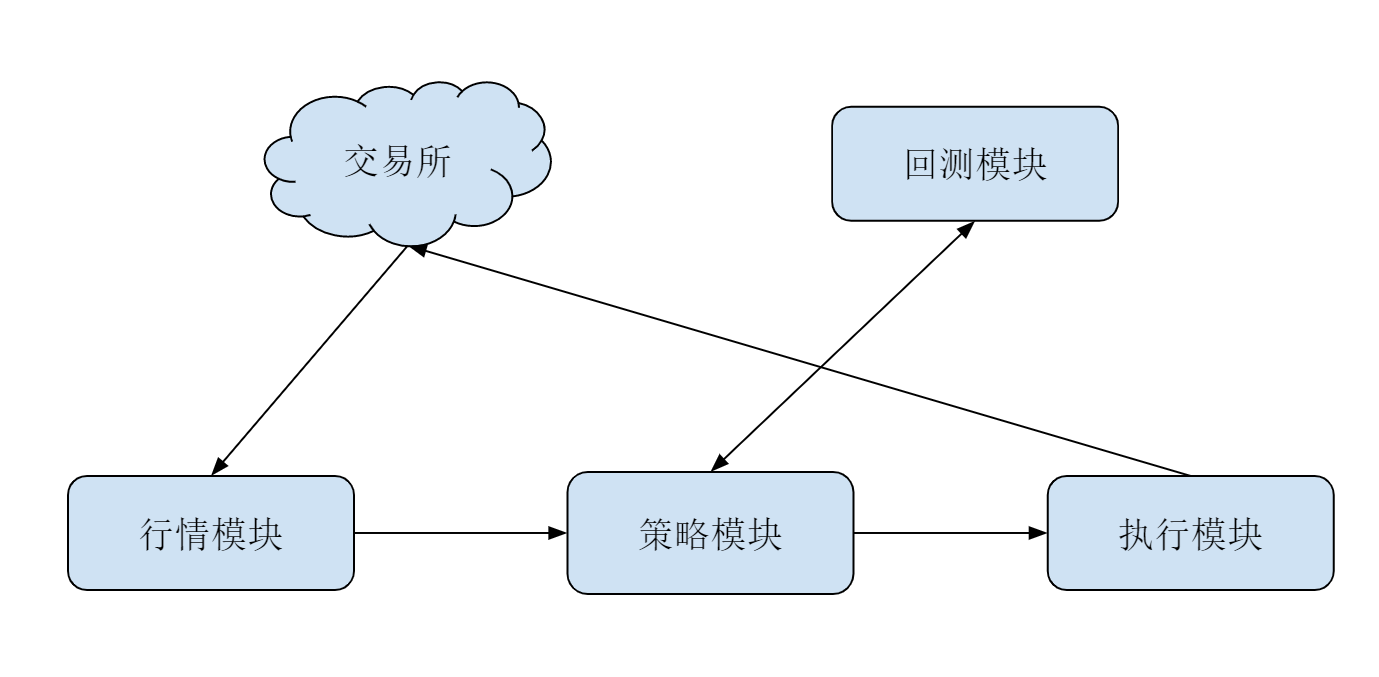

其中， 
1. 行情模块的主要功能是，尝试获取市场的行情数据，通常也负责获取交易账户的状态。 
2. 策略模块的主要功能是，订阅市场的数据，根据设定的算法发出买、卖指令给执行模块。 
3. 执行模块的主要功能是，接受并把策略模块发过来的买、卖指令封装并转发到交易所；同时，监督并确保策略买卖的完整执行。


# Python 算法交易

Python用于金融算法的主要原因

## 数据分析能力

算法交易领域的一个基本需求，就是高效数据处理能力，而数据处理则是 Python 的强项。特别是 NumPy+Pandas 的组合，简直让算法交易开发者的生活质量直线上升。

我们可以用一个简单的例子来展示一下，如何抓取、格式化和绘制，比特币过去一个小时在 Gemini 交易所的价格曲线。

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import requests


# 选择要获取的数据时间段
periods = '3600'

# 通过Http抓取btc历史价格数据
resp = requests.get('https://api.cryptowat.ch/markets/gemini/btcusd/ohlc', 
  params={
    'periods': periods
  })
data = resp.json()

# 转换成pandas data frame
df = pd.DataFrame(
  data['result'][periods], 
  columns=[
    'CloseTime',
    'OpenPrice',
    'HighPrice',
    'LowPrice',
    'ClosePrice',
    'Volume',
    'NA'])

# 输出DataFrame的头部几行
print(df.head())

# 绘制btc价格曲线
df['ClosePrice'].plot(figsize=(14, 7))
plt.show()

########### 输出 ############### 
CloseTime OpenPrice HighPrice ... ClosePrice Volume NA 0 1558843200 8030.55 8046.30 ... 8011.20 11.642968 93432.459964 1 1558846800 8002.76 8050.33 ... 8034.48 8.575682 68870.145895 2 1558850400 8031.61 8036.14 ... 8000.00 15.659680 125384.519063 3 1558854000 8000.00 8016.29 ... 8001.46 38.171420 304342.048892 4 1558857600 8002.69 8023.11 ... 8009.24 3.582830 28716.385009

通过执行这样的一段代码，我们便可以得到下面这张图所示的价格曲线。
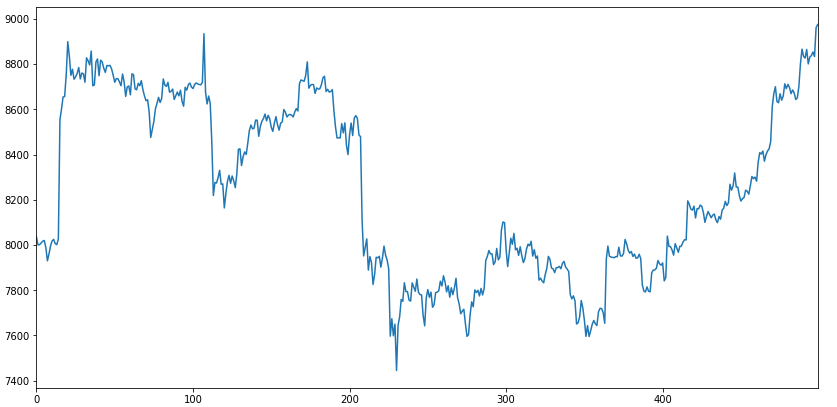


# 大量专有库 
除了强大的数据处理能力之外，Python 还有许许多多已经开发成熟的算法交易库可供使用。比如，你可以使用 Zipline 进行策略回测，或者用 Pyfolio 进行投资组合分析。而许多交易所也都提供了基于 Python 的 API 客户端。 

# 便利的交易平台 

有一些算法交易平台可以执行自定义 Python 策略，无需搭建量化交易框架。算法交易平台，实际上等效于帮用户完成了行情模块和执行模块。用户只需要在其中定义策略模块，即可进行算法交易和回测。 

比如，Quantopian，就提供了基于 Zipline 的标准回测环境。用户可以选择 Python 作为开发语言，并且和社区的网友分享自己的策略。此外，国内也有诸如 BigQuant、果仁网等类似平台，提供不同市场和金融产品的交易。 

# 广泛的行业应用 

目前，越来越多投资机构的交易部门，都开始使用 Python，因此也对优秀的 Python 开发者产生了更多的需求。